In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ete3 import Tree, ProfileFace, TreeStyle, BarChartFace

# Load the list of COGs

In [2]:
pd.read_csv("../Data/input/AllWLPGenes.csv", sep =";", comment = "#", header = 0)

,Category,Group,KeggRID,Substrate,Product,EC,GeneName,COG,KEGG,Reference gene,Reference,Description
0,Metabolic,MFR,R03015,CO2,formylMFR,1.2.7.12,fmdC,COG2218,K00202,NaN,NaN,NaN
1,Metabolic,THMPT,R03390,formylMFR,formylTHMPT,2.3.1.101,ftr,COG2037,K00672,NaN,NaN,NaN
2,Metabolic,THMPT,R03464,formylTHMPT,methenylTHMPT,3.5.4.27,mch,COG3252,K01499,NaN,NaN,NaN
3,Metabolic,THMPT,R04455,methenylTHMPT,methyleneTHMPT,1.5.98.1,mtd,COG1927,K00319,NaN,NaN,NaN
4,Metabolic,THMPT,R04464,methyleneTHMPT,methylTHMPT,1.5.98.2,mer,COG2141,K00320,NaN,NaN,NaN
5,Metabolic,THMPT,R10385,methylTHMPT,methyl-Co(III),2.1.1.245,mtrH,COG1962,K00584,NaN,NaN,NaN
6,Metabolic,THF,R12754,CO2,formate,1.17.98.4,fdhA,COG3383,K22015,NaN,NaN,NaN
7,Metabolic,THF,R00943,formate,formylTHF,6.3.4.3,fhs,COG2759,K00288,NaN,NaN,NaN
8,Metabolic,THF,R01655,formylTHF,methenylTHF,3.5.4.9,folD,COG0190,K01491,NaN,NaN,NaN
9,Metabolic,THF,R01220,methenylTHF,methyleneTHF,1.5.1.5,mtdA,COG0373,K00300,NaN,NaN,NaN


In [3]:
WLP = pd.read_csv("../Data/input/AllWLPGenes.csv", sep =";", comment = "#", header = 0).iloc[:,[0,1,6,7]]
WLP = WLP.loc[:,["Category","Group","GeneName","COG"]]
WLP["COGName"] = WLP.GeneName+" ("+WLP.COG+")"
WLP

,Category,Group,GeneName,COG,COGName
0,Metabolic,MFR,fmdC,COG2218,fmdC (COG2218)
1,Metabolic,THMPT,ftr,COG2037,ftr (COG2037)
2,Metabolic,THMPT,mch,COG3252,mch (COG3252)
3,Metabolic,THMPT,mtd,COG1927,mtd (COG1927)
4,Metabolic,THMPT,mer,COG2141,mer (COG2141)
5,Metabolic,THMPT,mtrH,COG1962,mtrH (COG1962)
6,Metabolic,THF,fdhA,COG3383,fdhA (COG3383)
7,Metabolic,THF,fhs,COG2759,fhs (COG2759)
8,Metabolic,THF,folD,COG0190,folD (COG0190)
9,Metabolic,THF,mtdA,COG0373,mtdA (COG0373)


# Retrieve the gene counts from the Orthofinder results

In [4]:
emapper = pd.read_csv("../Data/input/MM_jbrjl6fg.emapper.annotations.tsv", sep ="\t", comment = "#", header = None)
emapper.columns = ["query","seed_ortholog","evalue","score","eggNOG_OGs","max_annot_lvl","COG_category","Description","Preferred_name","GOs","EC","KEGG_ko","KEGG_Pathway","KEGG_Module","KEGG_Reaction","KEGG_rclass","BRITE","KEGG_TC","CAZy","BiGG_Reaction","PFAMs"]

OFOGs = pd.read_csv("../Data/OFResults/Orthogroups.GeneCount.tsv", sep ="\t", comment = "#", index_col = 0, header = 0)

OFOG_Annot = pd.DataFrame()
OFOG_Annot["OFOG"] = emapper["query"].str.split(".",expand=True)[0]
OFOG_Annot["COG"] = emapper["eggNOG_OGs"].str.split("@",expand=True)[0]
OFOG_Annot.head()

,OFOG,COG
0,OG0000000,KOG0084
1,OG0000001,COG1136
2,OG0000003,COG1131
3,OG0000005,COG1028
4,OG0000006,COG2414


In [5]:
WLP_genes = WLP.COG.loc[WLP.COG.isin(OFOG_Annot.COG)]

WLP_genes_OFOGs = OFOG_Annot.set_index("COG").loc[WLP_genes.values]
WLP_genes_OFOGs.head()

,OFOG
COG,
COG2218,OG0001105
COG2037,OG0000363
COG3252,OG0000500
COG1927,OG0001166
COG2141,OG0000041


In [6]:
WLP_OFOGs_Count = OFOGs.loc[WLP_genes_OFOGs.OFOG.values].reset_index().merge(WLP_genes_OFOGs.reset_index(), how= "left", left_on="Orthogroup", right_on="OFOG").set_index("Orthogroup").drop(["Total","OFOG"], axis=1)
WLP_OFOGs_Count = WLP_OFOGs_Count.drop_duplicates()

COGsSpOI = WLP_OFOGs_Count.groupby(['COG']).sum()
COGsSpOI.head()

,UP000070043,UP000070149,UP000070599,UP000185561,UP000186063,UP000186209,UP000186239,UP000186851,UP000228988,UP000245584,...,UP000751408,UP000760201,UP000771954,UP000775429,UP000777023,UP000825566,UP000825906,UP000826397,UP000826686,UP000826833
COG,,,,,,,,,,,,,,,,,,,,,
COG0190,1,1,0,1,1,1,1,0,0,0,...,1,1,1,1,1,1,1,1,1,1
COG0685,1,0,0,1,1,0,0,0,0,1,...,2,1,2,0,2,0,1,1,0,1
COG1152,1,1,0,2,0,0,1,0,0,0,...,1,3,1,1,1,1,0,1,0,0
COG1410,0,0,0,0,1,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
COG1456,2,1,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,0,1,1,0


## Calculate median count per taxonomic sub group

In [7]:
ProposedClass = pd.read_csv("../Data/input/ProposedClassification.csv", sep =",", comment = "#", header = 0, index_col = "UPID")#["Organism"]
data = COGsSpOI.T.merge(ProposedClass, how = "left", left_index=True, right_index=True)#.groupby(["Group"])
COGs_ByGenus = data.groupby(data.iloc[:,-1]).median().T
COGs_ByGenus.head()

/var/folders/qr/vm827mh53sd6708z2k3_tnnrz3fj08/T/ipykernel_25047/4041458824.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  COGs_ByGenus = data.groupby(data.iloc[:,-1]).median().T


Group,Heimdallarchaeon 1,Heimdallarchaeon 2,Heimdallarchaeon 3,Heimdallarchaeon 4,Heimdallarchaeon 5,Lokiarchaeon 1,Lokiarchaeon 2,Lokiarchaeon 3,Lokiarchaeon 4,Lokiarchaeon 5,Odinarchaeon,Thorarchaeon
COG0190,0.5,1.0,1.0,1.0,0.0,1.0,0.5,0.0,0.5,1.0,0.0,1.0
COG0685,0.0,1.0,1.0,0.0,0.0,1.0,0.5,0.0,1.0,1.5,0.0,1.0
COG1152,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0
COG1410,0.5,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
COG1456,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,1.0,0.0,0.0


# Retrieve the gene counts from eggNOG

In [8]:
Root_OGMembers = pd.read_csv("../Data/input/1_members.tsv", sep ="\t", comment = "#", header = None, index_col = 1)

# Keep only the relevant rows, with COG related to BFEB
Root_OGs = Root_OGMembers[Root_OGMembers.index.isin(WLP.COG)]

#Restructure to a count matrix
Root_OGs["list"] = Root_OGs[4].str.split(",", expand = False)
Root_OGs = Root_OGs["list"].explode().str.split(".", expand = True, n=1)#.reset_index(name = "COG")
Root_OGs.columns = ["species","gene"]
Root_OGs = Root_OGs.reset_index()
Root_OGs.columns = ["COG","species","gene"]
Root_OG_Counts = Root_OGs.groupby(["COG","species"]).count().unstack().fillna(0)
Root_OG_Counts.columns = Root_OG_Counts.columns.droplevel(0)

#Subset to the chosen reference species
NCBIRefIDs = pd.read_csv("../Data/input/NCBIRefIDs.tsv", sep ="\t", comment = "#", header = None)
NCBIRefIDs.columns = ["TaxID", "TaxName"]
NCBIRefIDs = NCBIRefIDs.astype(str).set_index("TaxID").iloc[:-3]

COGsRefSp = Root_OG_Counts[NCBIRefIDs.index]
COGsRefSp.head()

/var/folders/qr/vm827mh53sd6708z2k3_tnnrz3fj08/T/ipykernel_25047/3886482802.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Root_OGs["list"] = Root_OGs[4].str.split(",", expand = False)


species,574087,931626,264732,33035,1123288,903814,748727,545694,903818,243232,426368,192952,323259,304371,410358,456320,419665,339860
COG,,,,,,,,,,,,,,,,,,
COG0190,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
COG0280,3.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
COG0282,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
COG0373,1.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
COG0685,1.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


# Combine OrthoFinder and EggNOG matrices

In [9]:
COGs = COGsRefSp.merge(COGs_ByGenus, how= "outer", left_on=None, right_on=None, left_index=True, right_index=True).fillna(0)

# Reformat by genes as rows

In [10]:
WLP_Genes = WLP.merge(COGs, how = "left", left_on="COG", right_index= True).set_index("COGName").drop(["GeneName","Category","Group","COG"],axis=1).fillna(0)
WLP_Genes.head()

,574087,931626,264732,33035,1123288,903814,748727,545694,903818,243232,...,Heimdallarchaeon 3,Heimdallarchaeon 4,Heimdallarchaeon 5,Lokiarchaeon 1,Lokiarchaeon 2,Lokiarchaeon 3,Lokiarchaeon 4,Lokiarchaeon 5,Odinarchaeon,Thorarchaeon
COGName,,,,,,,,,,,,,,,,,,,,,
fmdC (COG2218),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,1.0,0.5,0.5,0.0,1.0,1.0,1.0
ftr (COG2037),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.0,3.0,2.0,0.5,1.0,2.0,2.0,1.0
mch (COG3252),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.0,1.0,0.5,0.5,0.5,1.0,1.0,1.0
mtd (COG1927),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.5,1.0,1.0,0.5,0.5,0.0,1.0,1.0,1.0
mer (COG2141),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,4.5,1.0,2.0,3.5,1.0,0.0,1.0,2.0,6.0


In [11]:
SpeciesIndexDF = pd.read_csv("../Data/input/SpeciesIndexDF.tsv", sep ="\t", comment = "#", header = 0, index_col = "Proteome Id")["Organism"]
SpNamesID = pd.concat([SpeciesIndexDF,NCBIRefIDs["TaxName"]])
SpNamesID

UP000321408     Candidatus Prometheoarchaeum syntrophicum
UP000723406           Thorarchaeota archaeon (strain OWC)
UP000070043    Candidatus Thorarchaeota archaeon SMTZ1-83
UP000070149    Candidatus Thorarchaeota archaeon SMTZ1-45
UP000070599     Candidatus Thorarchaeota archaeon SMTZ-45
                                  ...                    
304371                            Methanocella paludicola
410358                       Methanocorpusculum labreanum
456320                               Methanococcus voltae
419665                             Methanococcus aeolicus
339860                          Methanosphaera stadtmanae
Length: 85, dtype: object

/var/folders/qr/vm827mh53sd6708z2k3_tnnrz3fj08/T/ipykernel_25047/2630776207.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LeavesToKeep["Feature"] = LeavesToKeep["TaxName"]


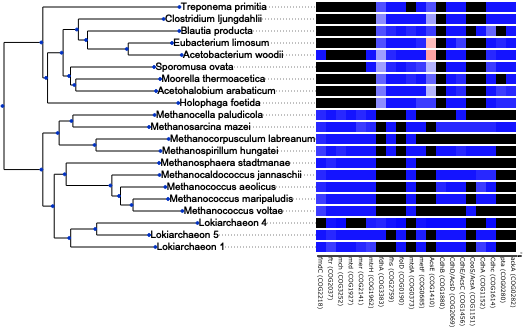

In [13]:
Combined = Tree("../Data/input/CombninedSpeciesTreeETE.nw", format=1)# made using orthofinder, NCBI ID's are slightly different to the ones from the strains in EggNOG so that's corrected in the .nw file.
Combined.ladderize()

LeavesToKeep = ProposedClass[~ProposedClass.iloc[:,0].duplicated()]
LeavesToKeep.columns = ["TaxName"]
Combined.prune(NCBIRefIDs.index.union(LeavesToKeep.index))

#Add columns to link to the count matrix
LeavesToKeep["Feature"] = LeavesToKeep["TaxName"]
NCBIRefIDs["Feature"] = NCBIRefIDs.index

# Combine into single indexing dataframe
SpNamesID = pd.concat([LeavesToKeep,NCBIRefIDs])

# Rename the Asgard leaves so that they match the median counts instead of the chosen species
for lf in Combined.iter_leaves():
    if lf.name in list(LeavesToKeep.index):
        lf.name = LeavesToKeep.loc[lf.name][0]

# Determined after running again, but manually keep only the species so that Asgardarchaea lacking the CODH complex are not kept.
Combined.prune(['545694','748727','33035','903814','931626','1123288','264732','574087','903818','304371','192952','410358','323259','339860','243232','419665','426368','456320','Lokiarchaeon 1','Lokiarchaeon 4','Lokiarchaeon 5'])

BranchOrder = Combined.get_leaf_names()

# Add the counts to the specific leaves of the tree and change the names from TaxID to actual names
for lf in Combined.iter_leaves():
    lf.add_features(profile = WLP_Genes[lf.name].values)
    lf.add_features(deviation = [0 for x in range(len(WLP_Genes))])
    lf.add_face(ProfileFace(max_v=36.0, min_v=0.0, center_v=10.0, style='heatmap', colorscheme=4, width=len(WLP_Genes)*10, height=10), column=0, position="aligned")
    lf.name = SpNamesID.set_index("Feature")["TaxName"][lf.name]

description = list(WLP_Genes.index)
axisface = BarChartFace([0]*len(list(WLP_Genes.index)), width=len(WLP_Genes)*10, height=0, labels=list(WLP_Genes.index), max_value=1, scale_fsize=1)

ts = TreeStyle()
ts.draw_guiding_lines = True
ts.show_leaf_name = True
ts.aligned_foot.add_face(axisface, 0)
ts.show_scale = False

#Combined.render('../Data/output/heatmap.png', tree_style=ts, dpi = 75)
Combined.render("%%inline",tree_style=ts, dpi = 75)

# Plot Separately for the figure

/var/folders/qr/vm827mh53sd6708z2k3_tnnrz3fj08/T/ipykernel_25047/2271094688.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LeavesToKeep["Feature"] = LeavesToKeep["TaxName"]


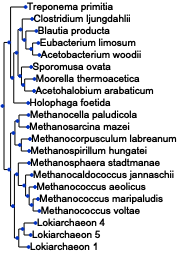

In [16]:
Combined = Tree("../Data/input/CombninedSpeciesTreeETE.nw", format=1)# made using orthofinder, NCBI ID's are slightly different to the ones from the strains in EggNOG so that's corrected in the .nw file.
Combined.ladderize()

LeavesToKeep = ProposedClass[~ProposedClass.iloc[:,0].duplicated()]
LeavesToKeep.columns = ["TaxName"]
Combined.prune(NCBIRefIDs.index.union(LeavesToKeep.index))

#Add columns to link to the count matrix
LeavesToKeep["Feature"] = LeavesToKeep["TaxName"]
NCBIRefIDs["Feature"] = NCBIRefIDs.index

# Combine into single indexing dataframe
SpNamesID = pd.concat([LeavesToKeep,NCBIRefIDs])

# Rename the Asgard leaves so that they match the median counts instead of the chosen species
for lf in Combined.iter_leaves():
    if lf.name in list(LeavesToKeep.index):
        lf.name = LeavesToKeep.loc[lf.name][0]

Combined.prune(['545694','748727','33035','903814','931626','1123288','264732','574087','903818','304371','192952','410358','323259','339860','243232','419665','426368','456320','Lokiarchaeon 1','Lokiarchaeon 4','Lokiarchaeon 5'])

BranchOrder = Combined.get_leaf_names()

        
# Add the counts to the specific leaves of the tree and change the names from TaxID to actual names
for lf in Combined.iter_leaves():
    lf.name = SpNamesID.set_index("Feature")["TaxName"][lf.name]

description = list(WLP_Genes.index)
axisface = BarChartFace([0]*len(list(WLP_Genes.index)), width=len(WLP_Genes)*10, height=0, labels=list(WLP_Genes.index), max_value=1, scale_fsize=1)

ts = TreeStyle()
ts.draw_guiding_lines = True
ts.show_leaf_name = True
ts.aligned_foot.add_face(axisface, 0)
ts.scale =  20
ts.show_scale = False

#Combined.render('../Data/output/heatmap.png', tree_style=ts, dpi = 75)
Combined.render("%%inline",tree_style=ts, dpi = 75)

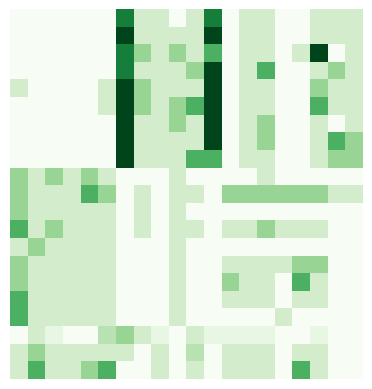

In [17]:
plt.imshow(WLP_Genes.loc[WLP.COGName[WLP.Category == "Metabolic"]].T.loc[BranchOrder], cmap='Greens', interpolation='nearest', vmin=0, vmax=5)
plt.axis('off')
plt.show()